In [189]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import numpy as np
import matplotlib as mpl


In [82]:
instagram = pd.read_csv("/Users/ana/ironhack_coding/projects/final_project/final-project/datasets/instagram_topics.csv")






In [83]:
instagram.head()




,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Date
0,0,0,12.0,0.1111,"link, bio, tip, celebration, credit, women_lea...",the best offense is a good defense so here's s...,2020-03-12T14:32:48.000Z
1,1,1,13.0,0.1073,"product, skin, oil, night, hand, sleep, order,...",nature reflects back to us our own imbalance. ...,2020-03-12T14:22:34.000Z
2,2,2,2.0,0.1004,"woman, fibroid, symptom, pain, risk, patient, ...",concerning the current outbreak of covid-19 (c...,2020-03-12T14:17:54.000Z
3,3,3,5.0,0.0988,"recipe, ingredient, minute, lunch, egg, place,...",lunch out today with my daughter😀 jacket potat...,2020-03-12T14:17:02.000Z
4,4,4,11.0,0.1111,"thing, time, life, health, heart, lot, care, c...","whenever you are faced with fear, you always h...",2020-03-12T14:01:39.000Z


In [24]:
instagram["Date"].min(), instagram['Date'].max()

('2016-04-23T16:05:03.000Z', '2020-03-12T15:02:20.000Z')

In [25]:
instagram["Date"].isnull().sum()

0

### Time series analysis

In [ ]:
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [28]:
#only date and value
df = instagram[["Date","Dominant_Topic"]]
df.head()


,Date,Dominant_Topic
0,2020-03-12T14:32:48.000Z,12.0
1,2020-03-12T14:22:34.000Z,13.0
2,2020-03-12T14:17:54.000Z,2.0
3,2020-03-12T14:17:02.000Z,5.0
4,2020-03-12T14:01:39.000Z,11.0


In [88]:
# dealing with time
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].dt.strftime('%d/%m/%Y')




In [89]:
df.head()




,Date,Dominant_Topic
0,12/03/2020,12.0
1,12/03/2020,13.0
2,12/03/2020,2.0
3,12/03/2020,5.0
4,12/03/2020,11.0


In [184]:
# first of all, see if the number of posts have been the same or not.
total_topics = df.groupby(["Date"]).count().reset_index()
total_topics.rename(columns = {"Dominant_Topic":"Num_posts"}, inplace= True)

total_topics


,Date,Num_posts
0,01/01/2020,40
1,01/02/2019,2
2,01/02/2020,78
3,01/03/2020,147
4,01/04/2019,2
5,01/05/2019,4
6,01/07/2017,1
7,01/07/2019,3
8,01/08/2019,4
9,01/09/2019,6


In [ ]:
## Plotting

total_topics.plot(total_topics["Date"], total_topics["Num_posts"])

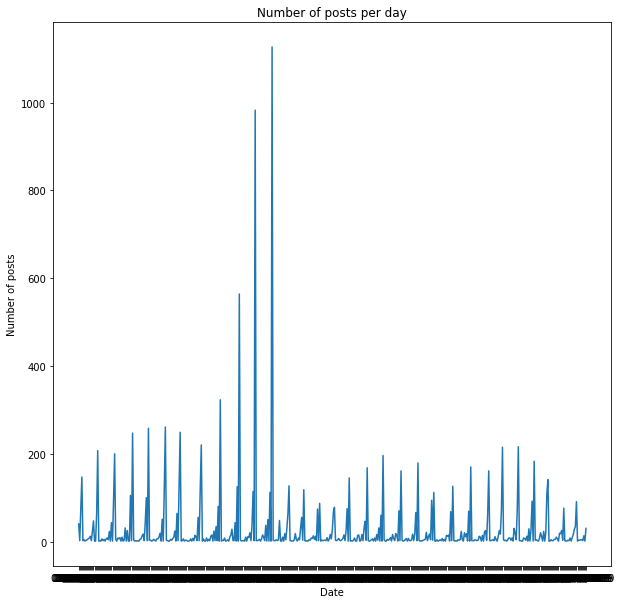

In [180]:
# Plot differences

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(total_topics["Date"], total_topics["Num_posts"])

ax.set(xlabel='Date', ylabel='Number of posts',
       title='Number of posts per day')

plt.show()

We can see there is a period of time where the number of posts was higher, this was probably during Christmas / New Years eve (to be confirmed if necessary. In general, we can also see that the umber of posts seem to follow a seasonality...is it maybe a monthly seasonality? TBC as well

In [185]:
# groupby to see how many posts each topic has a dap
diff_topics = df.groupby(["Date", "Dominant_Topic"]).size().reset_index()

diff_topics.head()




,Date,Dominant_Topic,0
0,01/01/2020,0.0,4
1,01/01/2020,1.0,2
2,01/01/2020,2.0,2
3,01/01/2020,3.0,11
4,01/01/2020,4.0,2
